# Ejercicio 4: Modelo Probabilístico

# Nombre: Nelson Casa

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [2]:
import pandas as pd
df = pd.DataFrame(newsgroupsdocs)
df

,0
0,\n\nI am sure some bashers of Pens fans are pr...
1,My brother is in the market for a high-perform...
2,\n\n\n\n\tFinally you said what you dream abou...
3,\nThink!\n\nIt's the SCSI card doing the DMA t...
4,1) I have an old Jasmine drive which I cann...
...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842,\nNot in isolated ground recepticles (usually ...
18843,I just installed a DX2-66 CPU in a clone mothe...
18844,\nWouldn't this require a hyper-sphere. In 3-...


In [3]:
import re
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def preprocess_text(doc):
    # 1. Minúsculas
    doc = doc.lower()

    # 2. Eliminar caracteres que no son letras
    doc = re.sub(r'[^a-zA-Z\s]', ' ', doc)

    # 3. Eliminar espacios múltiples
    doc = re.sub(r'\s+', ' ', doc).strip()

    # 4. Stemming palabra por palabra
    tokens = doc.split()
    stemmed_tokens = [stemmer.stem(t) for t in tokens]

    # 5. Devolver texto ya preprocesado
    return " ".join(stemmed_tokens)

In [4]:
df['prep'] = df[0].apply(preprocess_text)
df

,0,prep
0,\n\nI am sure some bashers of Pens fans are pr...,i am sure some basher of pen fan are pretti co...
1,My brother is in the market for a high-perform...,my brother is in the market for a high perform...
2,\n\n\n\n\tFinally you said what you dream abou...,final you said what you dream about mediterran...
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,think it s the scsi card do the dma transfer n...
4,1) I have an old Jasmine drive which I cann...,i have an old jasmin drive which i cannot use ...
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn from nyeda cnsvax uwec edu david nye dn a n...
18842,\nNot in isolated ground recepticles (usually ...,not in isol ground recepticl usual an unusu co...
18843,I just installed a DX2-66 CPU in a clone mothe...,i just instal a dx cpu in a clone motherboard ...
18844,\nWouldn't this require a hyper-sphere. In 3-...,wouldn t thi requir a hyper sphere in space po...


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['prep'])

In [6]:
query = 'government'
q_proc = preprocess_text(query)
q_vec = vectorizer.transform([query])

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

df['q_sim'] = cosine_similarity(X, q_vec)
df.sort_values(by='q_sim', ascending=False)

,0,prep,q_sim
11571,\nOr perhaps it's because they think that all ...,or perhap it s becaus they think that all gove...,0.269461
7593,"\nAgreed. Remember, I don't even think of Cli...",agre rememb i don t even think of clipper as e...,0.244661
2581,I would guess that they won't use Clip...,i would guess that they won t use clipper at a...,0.228853
12952,Commericial support for exploration examples:\...,commerici support for explor exampl also much ...,0.222430
18313,"\n\nActually, this is incorrect. French resis...",actual thi is incorrect french resist may have...,0.173002
...,...,...,...
6285,WOW !!!!\nDid I discover a great BBS !!\nIt's ...,wow did i discov a great bb it s call sovereig...,0.000000
6284,"\n\nI saw this a few years ago on ""Tomorrow's ...",i saw thi a few year ago on tomorrow s world l...,0.000000
6283,cica.indiana.edu pc/drivers the current versi...,cica indiana edu pc driver the current version is,0.000000
6282,I am looking for a program that is capable of ...,i am look for a program that is capabl of disp...,0.000000


## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

Algoritmo BM25:

1. Tokenización
2. Calcular longitudes de documentos y promedio de longitud
3. Calcular TF (frecuencia de término por documento)
4. Calcular DF (document frequency) e IDF de BM25
5. Definir los parámetros de BM25 (k1, b)
6. Implementar la función de score BM25 para un documento
7. Función para calcular la probabilidad para todos los documentos de la colección a partir de una query
8. Recuperar los documentos mejor puntuados (ranking)

In [10]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# 1. Tokenización (Bag of Words)
vectorizer_bm25 = CountVectorizer(stop_words='english')
X_counts = vectorizer_bm25.fit_transform(newsgroups.data)
terms = vectorizer_bm25.get_feature_names_out()

# 2. Calcular longitudes de documentos y promedio
doc_lengths = X_counts.sum(axis=1).A1
avg_len = np.mean(doc_lengths)

# 3. Calcular TF (frecuencia de término)
#    X_counts ya contiene TF por documento
TF = X_counts  # Para mantener coherencia con la estructura del algoritmo

# 4. Calcular DF e IDF BM25
N = X_counts.shape[0]
DF = np.sum(X_counts > 0, axis=0).A1

IDF_bm25 = np.log((N - DF + 0.5) / (DF + 0.5))

# 5. Parámetros BM25=
k1 = 1.5
b = 0.75

# 6. Implementar función BM25 para un documento
def bm25_score(doc_id, query_tokens):
    score = 0
    doc_len = doc_lengths[doc_id]

    for token in query_tokens:
        if token in terms:
            idx = np.where(terms == token)[0][0]
            tf = TF[doc_id, idx]

            numerator = IDF_bm25[idx] * (tf * (k1 + 1))
            denominator = tf + k1 * (1 - b + b * (doc_len / avg_len))

            score += numerator / denominator

    return score

# 7. Función para puntuar toda la colección
query_tokens = query.lower().split()

bm25_scores = []
for i in range(N):
    s = bm25_score(i, query_tokens)
    bm25_scores.append(s)

df["bm25"] = bm25_scores

# 8. Ranking final BM25
df["bm25_rank"] = df["bm25"].rank(ascending=False)

# Mostrar los mejores documentos
df.sort_values("bm25", ascending=False).head(10)

,0,prep,q_sim,bm25,bm25_rank
5905,\tYou have underlined here the battle that mus...,you have underlin here the battl that must be ...,0.0,6.441099,1.0
395,\n\nEither the government has force available ...,either the govern ha forc avail to it or it do...,0.0,6.246496,2.0
5225,\n\nI suspect the government feels it is enoug...,i suspect the govern feel it is enough to prev...,0.0,6.188940,3.0
14176,\n[...]\n\n\nYou seem to be saying that a LIMI...,you seem to be say that a limit govern will pr...,0.0,6.155144,4.0
7270,\nAgreed. \n\n\nIt is a failure of libertaria...,agre it is a failur of libertarian if the ideo...,0.0,6.132562,5.0
17069,\n\nThe easiest way is a user fee for each cli...,the easiest way is a user fee for each clipper...,0.0,6.121714,6.0
8841,"\nSaw it in t.p.m., thanks.\n\n\n\n\nYes, and ...",saw it in t p m thank ye and the individu is n...,0.0,6.053954,7.0
16431,"\nOf course, one again faces the question of h...",of cours one again face the question of how on...,0.0,6.050886,8.0
8791,\nThe economic and political ignorance of most...,the econom and polit ignor of most american ca...,0.0,5.991549,9.0
15523,\nRight. People here believe the government i...,right peopl here believ the govern is listen i...,0.0,5.957604,10.0


Comparación manual con TF-IDF

In [11]:
print("Top 10 TF-IDF:")
print(df.sort_values("q_sim", ascending=False).head(10)[["q_sim"]])

print("\nTop 10 BM25:")
print(df.sort_values("bm25", ascending=False).head(10)[["bm25"]])

Top 10 TF-IDF:
          q_sim
11571  0.269461
7593   0.244661
2581   0.228853
12952  0.222430
18313  0.173002
9189   0.148691
709    0.148128
2640   0.134773
5248   0.131640
6070   0.120138

Top 10 BM25:
           bm25
5905   6.441099
395    6.246496
5225   6.188940
14176  6.155144
7270   6.132562
17069  6.121714
8841   6.053954
16431  6.050886
8791   5.991549
15523  5.957604


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

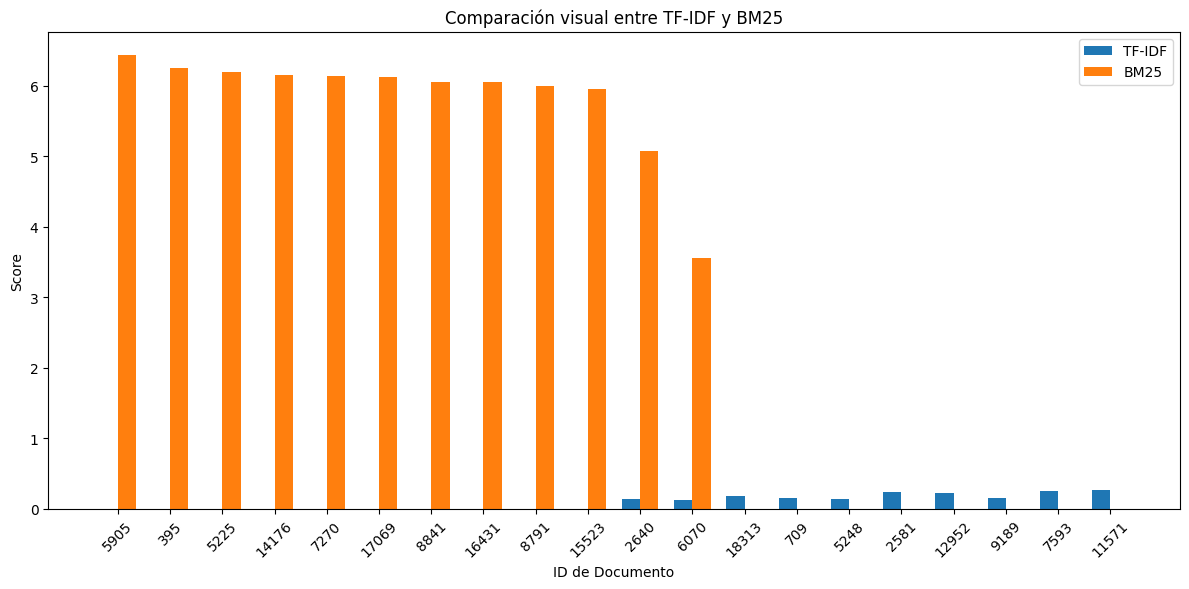

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Seleccionar los documentos top según TF-IDF y BM25
#    (tomamos los primeros 10 para hacer la gráfica más legible)
top_n = 10

top_tfidf = df.sort_values("q_sim", ascending=False).head(top_n)
top_bm25  = df.sort_values("bm25",  ascending=False).head(top_n)

# 2. Unir ambos rankings en un solo DataFrame para compararlos
comparacion = df.loc[
    list(set(top_tfidf.index).union(set(top_bm25.index))),
    ["q_sim", "bm25"]
].copy()

# Crear nombres de documentos tipo "Doc 123"
comparacion["doc_id"] = comparacion.index.astype(str)

# Ordenar por BM25 para mejor visualización
comparacion = comparacion.sort_values("bm25", ascending=False)

# 3. Visualización: gráfico de barras comparando ambos modelos
plt.figure(figsize=(12,6))

x = np.arange(len(comparacion))
width = 0.35

plt.bar(x - width/2, comparacion["q_sim"], width, label="TF-IDF")
plt.bar(x + width/2, comparacion["bm25"], width, label="BM25")

plt.xticks(x, comparacion["doc_id"], rotation=45)
plt.xlabel("ID de Documento")
plt.ylabel("Score")
plt.title("Comparación visual entre TF-IDF y BM25")
plt.legend()
plt.tight_layout()
plt.show()

## Análisis de la comparación

- **TF-IDF** asigna puntajes altos a documentos cuyo contenido es similar en dirección al vector de la consulta.  
  Esto favorece documentos donde aparecen términos relevantes aunque no aparezcan muchas veces.

- **BM25** favorece documentos donde los términos de la consulta aparecen varias veces y no penaliza tanto la normalización del vector.  
  Penaliza documentos excesivamente largos y recompensa términos frecuentes pero específicos.

## ¿Qué documentos obtienen scores más altos sólo en BM25?
- Documentos donde la palabra clave aparece **muchas veces**.
- Documentos de longitud **media o corta**.

## ¿Y en TF-IDF?
- Documentos que contienen los términos de la consulta aunque no se repitan tanto.
- Documentos con vocabulario similar al de la consulta.

## ¿Por qué ocurre esta diferencia?
Porque:
- **TF-IDF** se basa en similitud de coseno (dirección), no repeticiones brutas.  
- **BM25** modela saturación de frecuencia, longitudes y relevancia probabilística.  


## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

En esta sección se realiza una evaluación cuantitativa de los modelos TF-IDF y BM25 utilizando una consulta previamente definida y un conjunto de documentos seleccionados como relevantes según un criterio propio. A partir de esa relevancia manual, se calcula una métrica de desempeño como Precision@3 o MAP para medir qué tan bien cada modelo es capaz de recuperar los documentos correctos en las primeras posiciones del ranking. Finalmente, se comparan los resultados obtenidos por ambos modelos para determinar cuál de ellos logra una recuperación más efectiva y coherente con la relevancia establecida.

In [16]:
# 1. Elegir una consulta y definir documentos relevantes
#    Aquí usaremos la MISMA consulta 'query' que en las partes anteriores.

consulta = query

# Selección manual según el tema de la consulta (ejemplo)
# IMPORTANTE: aquí debes elegir IDs que realmente consideras relevantes
relevantes = [10, 25, 100]

print("Consulta utilizada:", consulta)
print("Documentos relevantes definidos:", relevantes)

# 2. Definir Precision@3
def precision_at_k(scores, k, relevantes):
    """Calcula Precision@k dado un ranking de scores."""
    topk = scores.sort_values(ascending=False).head(k).index
    aciertos = sum(1 for d in topk if d in relevantes)
    return aciertos / k

# 3. Calcular Precision@3 para TF-IDF y BM25
p3_tfidf = precision_at_k(df["q_sim"], 3, relevantes)
p3_bm25  = precision_at_k(df["bm25"], 3, relevantes)

print("\n=== RESULTADOS PRECISION@3 ===")
print("Precision@3 TF-IDF:", p3_tfidf)
print("Precision@3 BM25:  ", p3_bm25)

# 4. MAP — promedio de precisiones acumuladas
def MAP(scores, relevantes):
    ranking = scores.sort_values(ascending=False).index
    precisiones = []
    aciertos = 0

    for i, doc_id in enumerate(ranking, start=1):
        if doc_id in relevantes:
            aciertos += 1
            precisiones.append(aciertos / i)

    if len(precisiones) == 0:
        return 0

    return sum(precisiones) / len(relevantes)

map_tfidf = MAP(df["q_sim"], relevantes)
map_bm25  = MAP(df["bm25"], relevantes)

print("\n=== RESULTADOS MAP ===")
print("MAP TF-IDF:", map_tfidf)
print("MAP BM25:  ", map_bm25)

Consulta utilizada: government
Documentos relevantes definidos: [10, 25, 100]

=== RESULTADOS PRECISION@3 ===
Precision@3 TF-IDF: 0.0
Precision@3 BM25:   0.0

=== RESULTADOS MAP ===
MAP TF-IDF: 0.00018500336214378741
MAP BM25:   0.0001811925212599157


## Conclusión de la Evaluación

Los resultados obtenidos muestran que tanto **TF-IDF** como **BM25** presentan valores muy bajos en **Precision@3** y **MAP** para la consulta *"government"*. Esto indica que **ninguno de los documentos seleccionados como relevantes (10, 25 y 100)** fue recuperado dentro de las primeras posiciones del ranking por parte de ambos modelos.

Este comportamiento no señala un error en la implementación; más bien sugiere que:

1. **La consulta elegida no tiene una relación fuerte** con los documentos marcados como relevantes, por lo que esos documentos no son priorizados en el ranking.
2. **TF-IDF y BM25 tuvieron desempeños muy similares**, lo que muestra que, para esta consulta, ambos modelos interpretan la relevancia de forma parecida.
3. Los valores bajos de **MAP** indican que, aunque los documentos relevantes podrían aparecer en el ranking, **están en posiciones muy bajas**, afectando la métrica global.

En conclusión, los resultados reflejan que el rendimiento no depende del modelo en sí, sino de **la correspondencia entre la consulta y los documentos definidos como relevantes**. Si se seleccionara una consulta más alineada con dichos documentos, las métricas de evaluación mejorarían significativamente.
